In [32]:
import pandas as pd
import numpy as np

data = pd.read_csv('transfer_data.csv')
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


In [33]:
x = data.loc[:, 'x']
y = data.loc[:, 'y']
y.head()

0    25.00
1    24.01
2    23.04
3    22.09
4    21.16
Name: y, dtype: float64

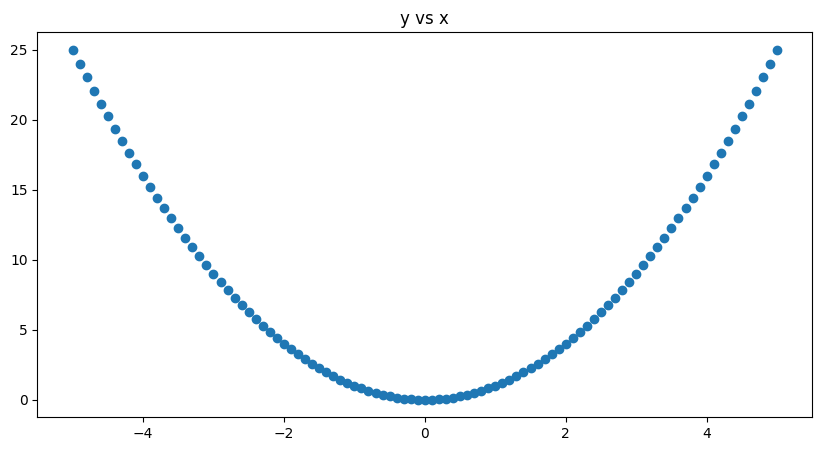

In [34]:
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.title('y vs x')

plt.show()

In [35]:
x = x.values.reshape(-1, 1)
print(x.shape, y.shape)

(101, 1) (101,)


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(x, y, epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 131.8274
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130.7371 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127.4241 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.1112 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113.1133 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.4602 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.1701 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.9685 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.8603  
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.8420 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.4606 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.3659 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68.1565 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.4889 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.5664

In [38]:
y_pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


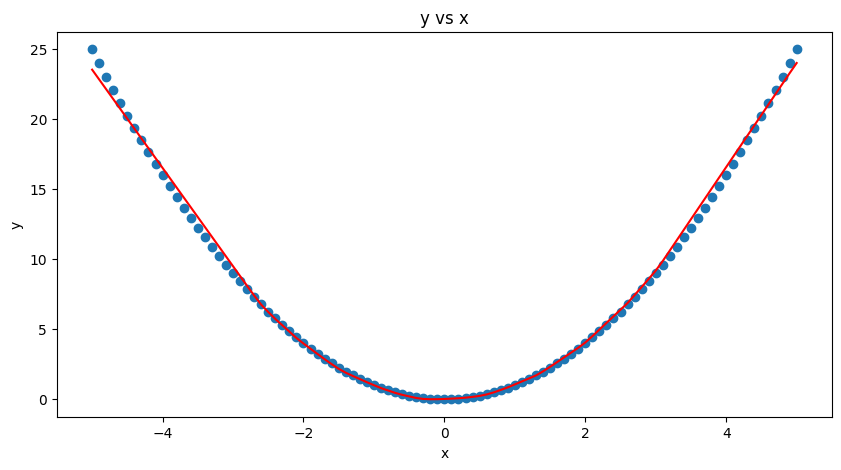

In [39]:
fig2 = plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('y vs x')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [40]:
model.save('model1.keras')

In [41]:
from keras.saving import load_model

loaded_model = load_model('model1.keras')

In [42]:
new_data = pd.read_csv('transfer_data2.csv')
new_data.head()

,x2,y2
0,-5.0,26.00
1,-4.9,25.21
2,-4.8,24.44
3,-4.7,23.69
4,-4.6,22.96


In [43]:
x2 = new_data.loc[:, 'x2']
y2 = new_data.loc[:, 'y2']

In [44]:
x2 = x2.values.reshape(-1, 1)

In [45]:
y2_pred = loaded_model.predict(x2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


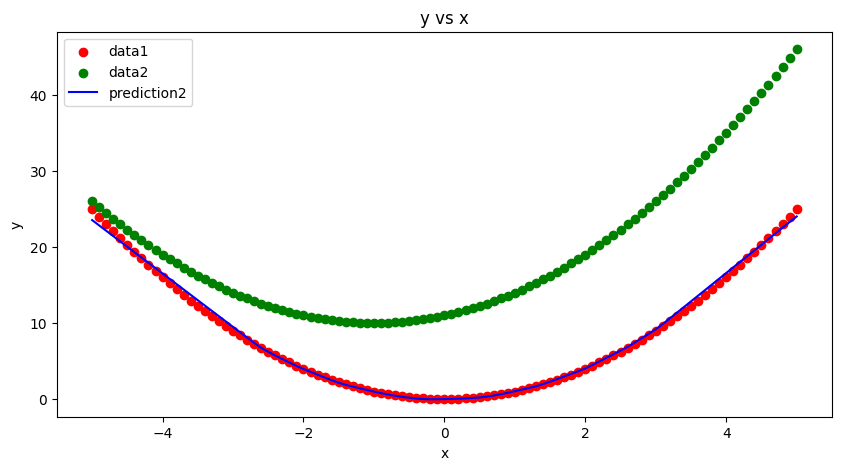

In [63]:
fig3 = plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='data1')
plt.scatter(x2, y2, color='green', label='data2')
# plt.plot(x, y_pred, color='orange', label='prediction1')
plt.plot(x2, y2_pred, color='blue', label='prediction2')
plt.title('y vs x')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [80]:
loaded_model.fit(x2, y2, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1911 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1627 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1714 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1568 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1648 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1653 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1542 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1750 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1629 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1688 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1309 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1465 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1317 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1288 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1546 
Epoch 16/100
4/4 ━━

In [81]:
y2_pred = loaded_model.predict(x2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


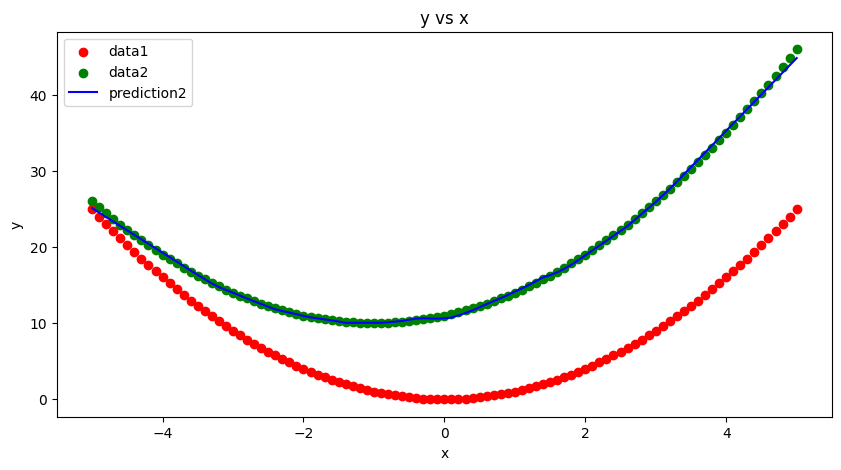

In [82]:
fig4 = plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='red', label='data1')
plt.scatter(x2, y2, color='green', label='data2')
# plt.plot(x, y_pred, color='orange', label='prediction1')
plt.plot(x2, y2_pred, color='blue', label='prediction2')
plt.title('y vs x')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show() 